<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Séries Temporais
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Wrangling;</li>
  <li>Decomposição.</li>
</ol>

---

# **Exercícios**

## 1\. Correlação entre consumo de energia elétrica e temperatura

Neste exercício, vamos correlacionar a base de dados de consumo de energia elétrica vista em aula com uma base de dados de temperatura média das tres maiores cidades do sudeste: **São Paulo**, **Rio de Janeiro** e **Belo Horizonte**. Os dados de temperatura estão presente neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv) e foram extraídos diretamento do [site](https://portal.inmet.gov.br) do instituto nacional de meteorologias (INMTE), órgão do governo vinculado ao ministério de agricultura, pecuária e abastecimento.

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **1.1. Energia** 

Carregue os dados de **energia** com o código abaixo e responda as perguntas abaixo:

In [3]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv' -O 'energia.csv'

In [27]:
energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

/tmp/ipykernel_24043/3697779589.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)


In [28]:
energia.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [29]:
energia.tail()

,referencia,residencial,industrial,comercial
199,2020-08-01,5671487,7697947,3198269
200,2020-09-01,5756787,7723167,3431649
201,2020-10-01,6241392,8042503,3890202
202,2020-11-01,5999235,7878699,3718647
203,2020-12-01,6377972,7832769,3965809


In [30]:
energia_df = energia.set_index(keys=['referencia'])

In [31]:
energia["referencia"].unique()

<DatetimeArray>
['2004-01-01 00:00:00', '2004-02-01 00:00:00', '2004-03-01 00:00:00',
 '2004-04-01 00:00:00', '2004-05-01 00:00:00', '2004-06-01 00:00:00',
 '2004-07-01 00:00:00', '2004-08-01 00:00:00', '2004-09-01 00:00:00',
 '2004-10-01 00:00:00',
 ...
 '2020-03-01 00:00:00', '2020-04-01 00:00:00', '2020-05-01 00:00:00',
 '2020-06-01 00:00:00', '2020-07-01 00:00:00', '2020-08-01 00:00:00',
 '2020-09-01 00:00:00', '2020-10-01 00:00:00', '2020-11-01 00:00:00',
 '2020-12-01 00:00:00']
Length: 204, dtype: datetime64[ns]

Responda:

 - Qual é a granularidade da base de dados: **Granularidade mensal**
 - Qual é o intervalo de tempo (min/max): **Partindo de Janeiro de 2004 até Dezembro de 2020**

### **1.2. Temperatura** 

Carregue os dados de **temperatura** com o código abaixo e responda as perguntas abaixo:

In [13]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv' -O 'temperatura.csv'

In [14]:
temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

/tmp/ipykernel_24043/1081947969.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0], infer_datetime_format=True)


In [15]:
temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


In [16]:
temperatura.tail()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
896,2020-12-27,20,24.0,23.0
897,2020-12-28,21,25.0,23.0
898,2020-12-29,22,27.0,23.0
899,2020-12-30,24,27.0,23.0
900,2020-12-31,23,29.0,24.0


In [36]:
temperatura_df = temperatura.set_index(keys=['referencia'])

In [17]:
temperatura["referencia"].unique

<bound method Series.unique of 0     2018-07-15
1     2018-07-16
2     2018-07-17
3     2018-07-18
4     2018-07-19
         ...    
896   2020-12-27
897   2020-12-28
898   2020-12-29
899   2020-12-30
900   2020-12-31
Name: referencia, Length: 901, dtype: datetime64[ns]>

Responda:

 - Qual é a granularidade da base de dados: **Granulidade diária**
 - Qual é o intervalo de tempo (min/max): **Início em 16/07/2018 e Fim em 31/12/2020**

## 2\. Processamento 

### **2.1. Energia** 

Processe o dataframe `energia`:

 - **a.** Atributa ao index a coluna temporal.

In [32]:
# Criando novas colunas
energia_df['mês'] = energia_df.index.month
energia_df['ano'] = energia_df.index.year

energia_df.head()

,residencial,industrial,comercial,mês,ano
referencia,,,,,
2004-01-01,3694386,6977471,2450453,1,2004
2004-02-01,3511541,7084623,2396965,2,2004
2004-03-01,3629455,7087613,2402521,3,2004
2004-04-01,3733863,7384540,2580914,4,2004
2004-05-01,3537269,7258307,2344084,5,2004


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [35]:
# Slicing temporal
energia_df['2019':'2020']

,residencial,industrial,comercial,mês,ano
referencia,,,,,
2019-01-01,6389714,7545071,4370412,1,2019
2019-02-01,6188834,7285407,4365504,2,2019
2019-03-01,6072327,7556147,4303463,3,2019
2019-04-01,5610278,7494816,4115920,4,2019
2019-05-01,5785412,7597072,4141319,5,2019
2019-06-01,5269701,7384031,3726296,6,2019
2019-07-01,5152318,7434149,3547092,7,2019
2019-08-01,5201820,7485988,3575392,8,2019
2019-09-01,5376428,7411807,3768173,9,2019


 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

### **2.2. Temperatura** 

Processe o dataframe `temperatura`:

 - **a.** Atributa ao index a coluna temporal.

In [37]:
# Criando novas colunas
temperatura_df['mês'] = temperatura_df.index.month
temperatura_df['ano'] = temperatura_df.index.year

temperatura_df.head()

,temp-media-sp,temp-media-rj,temp-media-mg,mês,ano
referencia,,,,,
2018-07-15,18,21.0,19.0,7,2018
2018-07-16,19,23.0,19.0,7,2018
2018-07-17,17,21.0,19.0,7,2018
2018-07-18,18,23.0,19.0,7,2018
2018-07-19,19,23.0,19.0,7,2018


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [38]:
# Slicing temporal
temperatura_df['2019':'2020']

,temp-media-sp,temp-media-rj,temp-media-mg,mês,ano
referencia,,,,,
2019-01-01,22,28.0,21.0,1,2019
2019-01-02,25,28.0,24.0,1,2019
2019-01-03,26,31.0,24.0,1,2019
2019-01-04,23,31.0,22.0,1,2019
2019-01-05,21,28.0,23.0,1,2019
...,...,...,...,...,...
2020-12-27,20,24.0,23.0,12,2020
2020-12-28,21,25.0,23.0,12,2020
2020-12-29,22,27.0,23.0,12,2020


 - **c.** Remova todas as linhas que apresentem pelo menos um valores nulo.

In [39]:
temperatura_df.dropna()
temperatura_df['2019':'2020']

,temp-media-sp,temp-media-rj,temp-media-mg,mês,ano
referencia,,,,,
2019-01-01,22,28.0,21.0,1,2019
2019-01-02,25,28.0,24.0,1,2019
2019-01-03,26,31.0,24.0,1,2019
2019-01-04,23,31.0,22.0,1,2019
2019-01-05,21,28.0,23.0,1,2019
...,...,...,...,...,...
2020-12-27,20,24.0,23.0,12,2020
2020-12-28,21,25.0,23.0,12,2020
2020-12-29,22,27.0,23.0,12,2020


 - **d.** Combine as três colunas de temperatura em uma só chamada de `temp-media` e agregadas pela **média** (obtendo assim uma temperatura média aproximada da região sudeste). 

In [40]:
# Criação de coluna temp-media
temperatura_df['temp-media'] = temperatura_df[['temp-media-sp', 'temp-media-rj', 'temp-media-mg']].mean(axis=1)
temperatura_df['2019':'2020']

,temp-media-sp,temp-media-rj,temp-media-mg,mês,ano,temp-media
referencia,,,,,,
2019-01-01,22,28.0,21.0,1,2019,23.666667
2019-01-02,25,28.0,24.0,1,2019,25.666667
2019-01-03,26,31.0,24.0,1,2019,27.000000
2019-01-04,23,31.0,22.0,1,2019,25.333333
2019-01-05,21,28.0,23.0,1,2019,24.000000
...,...,...,...,...,...,...
2020-12-27,20,24.0,23.0,12,2020,22.333333
2020-12-28,21,25.0,23.0,12,2020,23.000000
2020-12-29,22,27.0,23.0,12,2020,24.000000


 - **f.** Reamostre o dataframe para que sua granularidade seja a mesma dos dados de consumo de energia elétrica. Utilize a **média** como métrica de agregação. 

In [43]:
# Reamostrando dataframe
resampled = temperatura_df.resample(rule='m').mean()
resampled['2019':'2020']

,temp-media-sp,temp-media-rj,temp-media-mg,mês,ano,temp-media
referencia,,,,,,
2019-01-31,24.000000,29.774194,24.483871,1.0,2019.0,26.086022
2019-02-28,21.928571,27.464286,23.571429,2.0,2019.0,24.321429
2019-03-31,21.258065,26.645161,23.032258,3.0,2019.0,23.645161
2019-04-30,20.833333,26.066667,22.600000,4.0,2019.0,23.166667
2019-05-31,19.161290,24.193548,21.225806,5.0,2019.0,21.526882
2019-06-30,17.600000,22.800000,19.333333,6.0,2019.0,19.911111
2019-07-31,15.580645,21.096774,18.193548,7.0,2019.0,18.290323
2019-08-31,16.032258,20.935484,20.129032,8.0,2019.0,19.032258
2019-09-30,18.333333,22.766667,23.100000,9.0,2019.0,21.400000


 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

## 3\. Correlação 

### **3.1. Consumo residencial** 

 - **a.** Gere um gráfico de linha para a série temporal de **temperatura** média agregada `temp-media`.

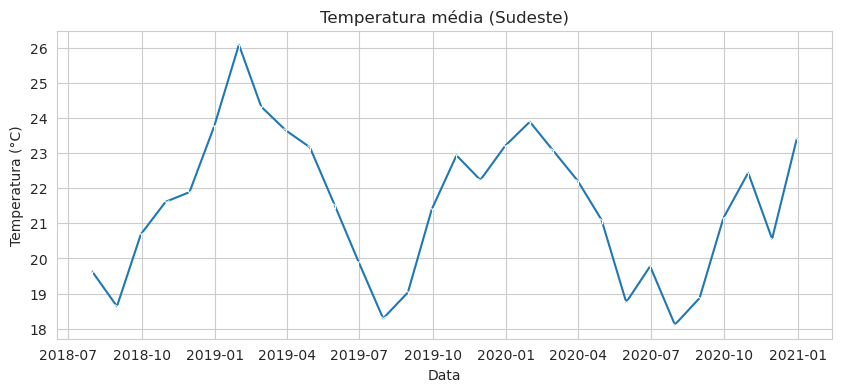

In [44]:
# Gerando gráfico Temp x Data
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=resampled, x='referencia', y='temp-media', marker="1")
  grafico.set(title='Temperatura média (Sudeste)', ylabel='Temperatura (°C)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

 - **b.** Gere um gráfico de linha para a série temporal do consumo de energia **residencial**.

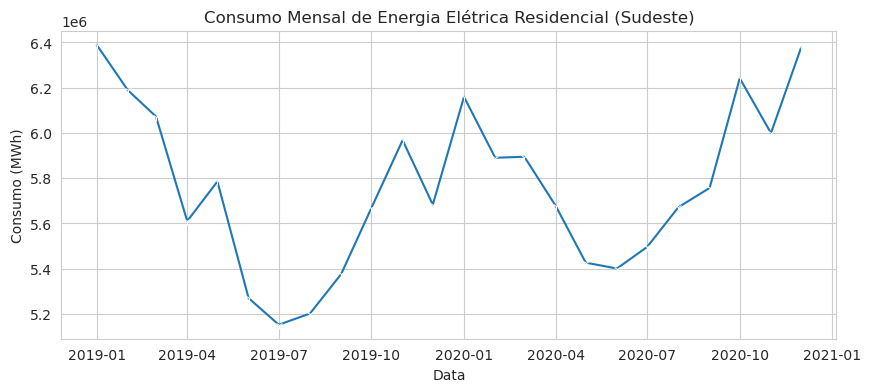

In [46]:
# Gerando gráfico Consumo x Data
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energia_df['2019':'2020'], x='referencia', y='residencial', marker="1")
  grafico.set(title='Consumo Mensal de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

 - **c.** Utilize o método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **residencial** e a **temperatura** média agregada `temp-media`.

In [81]:
# Slicing/Filtragem da energia e da temperatura
energia_filtered = energia_df['2019':'2020']
energia_filtered.index = energia_filtered.index.strftime('%Y/%m')

resampled_filtered = resampled['2019':'2020']
resampled_filtered.index = resampled_filtered.index.strftime('%Y/%m')

# Combinando os DataFrames usando o índice de datas
combined_df = pd.merge(resampled_filtered[['temp-media']], energia_filtered[['residencial']], left_index=True, right_index=True)
combined_df.head()

,temp-media,residencial
referencia,,
2019/01,26.086022,6389714
2019/02,24.321429,6188834
2019/03,23.645161,6072327
2019/04,23.166667,5610278
2019/05,21.526882,5785412


In [82]:
# Calculando o coeficiente de correlação de Pearson
correlacao = np.corrcoef(combined_df['temp-media'], combined_df['residencial'])[0, 1]

# Exibindo o resultado
print(f"O coeficiente de correlação de Pearson entre o consumo de energia residencial e a temperatura média é: {correlacao}")

O coeficiente de correlação de Pearson entre o consumo de energia residencial e a temperatura média é: 0.7856657233442441


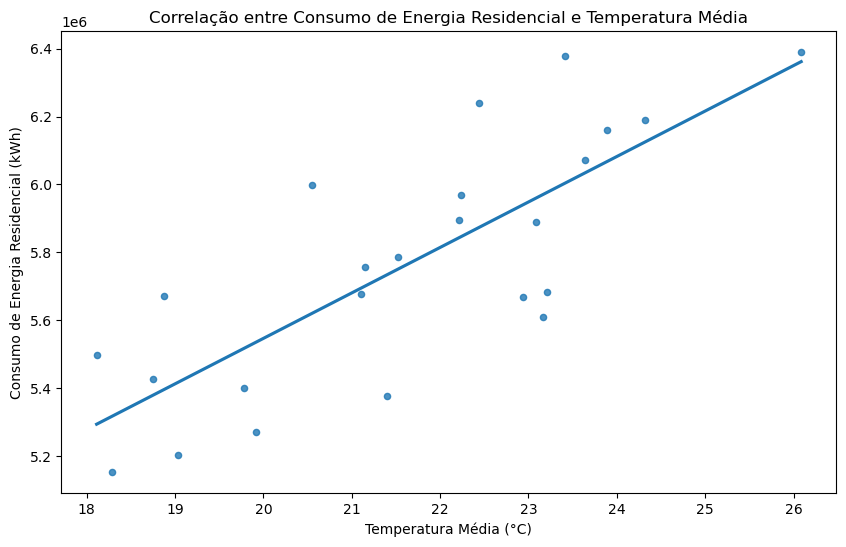

In [86]:
# Plotando o gráfico de dispersão com a linha de tendência
plt.figure(figsize=(10, 6))
sns.regplot(x='temp-media', y='residencial', data=combined_df, ci=None, scatter_kws={'s': 20})
plt.title('Correlação entre Consumo de Energia Residencial e Temperatura Média')
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Consumo de Energia Residencial (kWh)')
plt.show()

 - **d.** Baseado nas respostas dos itens anteriores, responda: A temperatura é um bom atributo para prever o consumo de energia elétrica **residencial**?



**Resposta:** Não apenas bom, mas talvez um dos melhores atributos para prever o consumo de energia elétrica residencial. Talvez ainda mais no comercial, dado o uso do ar-condicionado. Dificilmente um bom atributo para o consumo industrial, que se mantém equilibrado em todos os períodos do ano. Mas correlação não é causalidade. Apenas atesta para os padrões de comportamento da população dentro de um recorte temporal-geográfico específico.

### **3.2. Consumo comercial** 

Repita o exercício 3.1. para dados de consumo de energia elétrica **comercial**.

In [87]:
# Combinando os DataFrames usando o índice de datas
combined2_df = pd.merge(resampled_filtered[['temp-media']], energia_filtered[['comercial']], left_index=True, right_index=True)
combined2_df.head()

,temp-media,comercial
referencia,,
2019/01,26.086022,4370412
2019/02,24.321429,4365504
2019/03,23.645161,4303463
2019/04,23.166667,4115920
2019/05,21.526882,4141319


In [89]:
# Calculando o coeficiente de correlação de Pearson
correlacao = np.corrcoef(combined2_df['temp-media'], combined2_df['comercial'])[0, 1]

# Exibindo o resultado
print(f"O coeficiente de correlação de Pearson entre o consumo de energia comercial e a temperatura média é: {correlacao}")

O coeficiente de correlação de Pearson entre o consumo de energia comercial e a temperatura média é: 0.8497351051017309


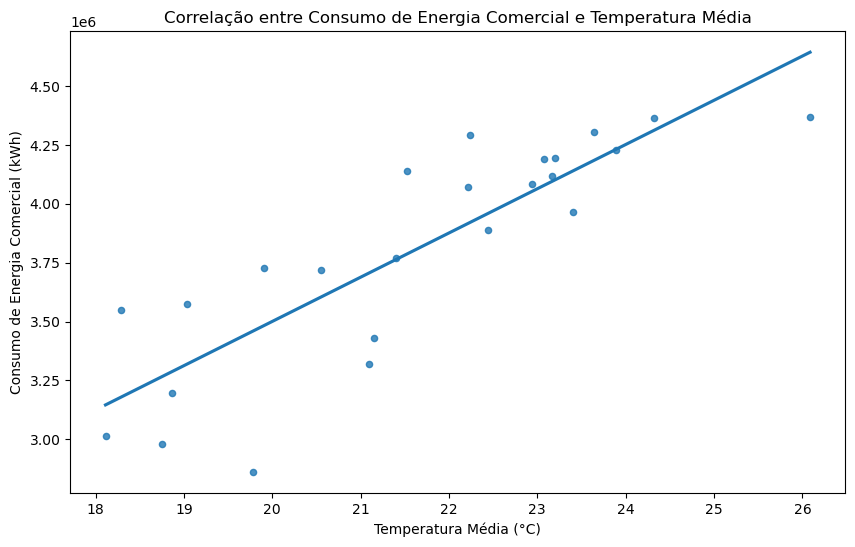

In [90]:
# Plotando o gráfico de dispersão com a linha de tendência
plt.figure(figsize=(10, 6))
sns.regplot(x='temp-media', y='comercial', data=combined2_df, ci=None, scatter_kws={'s': 20})
plt.title('Correlação entre Consumo de Energia Comercial e Temperatura Média')
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Consumo de Energia Comercial (kWh)')
plt.show()

**Resposta:** Como comentei anteriormente, a temperatura também é um bom atributo para prever o consumo comercial de energia.

### **3.3. Consumo industrial** 

Repita o exercício 3.1. para dados de consumo de energia elétrica **industrial**.

In [91]:
# Combinando os DataFrames usando o índice de datas
combined3_df = pd.merge(resampled_filtered[['temp-media']], energia_filtered[['industrial']], left_index=True, right_index=True)
combined3_df.head()

,temp-media,industrial
referencia,,
2019/01,26.086022,7545071
2019/02,24.321429,7285407
2019/03,23.645161,7556147
2019/04,23.166667,7494816
2019/05,21.526882,7597072


In [92]:
# Calculando o coeficiente de correlação de Pearson
correlacao = np.corrcoef(combined3_df['temp-media'], combined3_df['industrial'])[0, 1]

# Exibindo o resultado
print(f"O coeficiente de correlação de Pearson entre o consumo de energia industrial e a temperatura média é: {correlacao}")

O coeficiente de correlação de Pearson entre o consumo de energia industrial e a temperatura média é: 0.24102995038874758


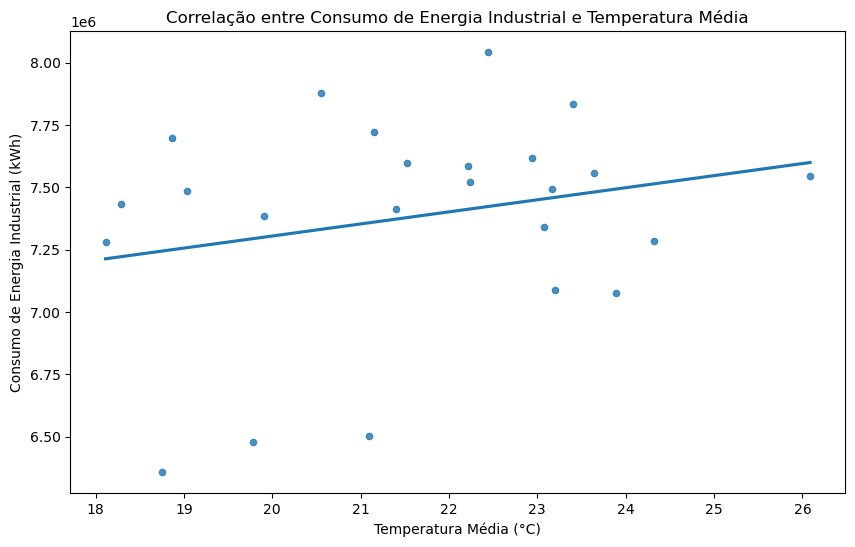

In [93]:
# Plotando o gráfico de dispersão com a linha de tendência
plt.figure(figsize=(10, 6))
sns.regplot(x='temp-media', y='industrial', data=combined3_df, ci=None, scatter_kws={'s': 20})
plt.title('Correlação entre Consumo de Energia Industrial e Temperatura Média')
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Consumo de Energia Industrial (kWh)')
plt.show()

**Resposta:** E aqui o mesmo, o consumo energético industrial não possui correlação forte com as flutuações de temperatura média, dessa forma este não é um atributo relevante para uma análise.

---